<a href="https://colab.research.google.com/github/mrdbourke/pytorch-deep-learning/blob/main/extras/exercises/03_pytorch_computer_vision_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 03. PyTorch Computer Vision Exercises

The following is a collection of exercises based on computer vision fundamentals in PyTorch.

They're a bunch of fun.

You're going to get to write plenty of code!

## Resources

1. These exercises are based on [notebook 03 of the Learn PyTorch for Deep Learning course](https://www.learnpytorch.io/03_pytorch_computer_vision/). 
2. See a live [walkthrough of the solutions (errors and all) on YouTube](https://youtu.be/_PibmqpEyhA). 
  * **Note:** Going through these exercises took me just over 3 hours of solid coding, so you should expect around the same.
3. See [other solutions on the course GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions).

In [ ]:
# Check for GPU
!nvidia-smi

Sat Apr 16 03:23:02 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   39C    P0    29W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [26]:
# Import torch
import torch

# Exercises require PyTorch > 1.10.0
print(torch.__version__)

# TODO: Setup device agnostic code

device = 'cuda' if torch.cuda.is_available() else 'cpu'
device


2.5.1+cpu


'cpu'

## 1. What are 3 areas in industry where computer vision is currently being used?

In [27]:
# Health: Used in the diagnosis of diseases, such as cancer, alhezimer disease, 

# Transport: For the development of self driven vehicle, warehouse haulage robots

# Identity management: Used in apps to detect emotions, age, facial features and other biometric data

## 2. Search "what is overfitting in machine learning" and write down a sentence about what you find. 

In [28]:
# Overfitting occurs when a machine model is only perform well on the training data but not on test and other real-life data. 
# This could be because of small size of the trainning data or due to biases in the data collection, which does not represent the population distribution
# The problem of Overfitting could be solved by collecting the train and test data using an appropriate sampling method or adding some noise to the data
# so that it represents a real-life scenerio


## 3. Search "ways to prevent overfitting in machine learning", write down 3 of the things you find and a sentence about each. 
> **Note:** there are lots of these, so don't worry too much about all of them, just pick 3 and start with those.

In [29]:
#  1. Cross-Validation: Divide your training data into multiple subsets (folds). Train and evaluate your model on different combinations of these folds. 
#                       This provides a more robust estimate of the model's performance

# Feature Selection/Dimensionality Reduction: Select only the most relevant features for training, or reduce the number of features 
#                                               using techniques like Principal Component Analysis (PCA)

# Data Augmentation:  How it works: Create new training samples by applying various transformations to existing data 
#                       (e.g., rotations, flips, crops for images; adding noise to audio)

## 4. Spend 20-minutes reading and clicking through the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/).

* Upload your own example image using the "upload" button on the website and see what happens in each layer of a CNN as your image passes through it.

In [30]:
# done

## 5. Load the [`torchvision.datasets.MNIST()`](https://pytorch.org/vision/stable/generated/torchvision.datasets.MNIST.html#torchvision.datasets.MNIST) train and test datasets.

In [31]:
from torchvision import transforms, datasets
ToTensor = transforms.ToTensor

# Download the MNIST dataset

train_dataset = datasets.MNIST(root='./data', train=True, download=False, transform=ToTensor())

test_dataset = datasets.MNIST(root='./data', train=False, download=False, transform=ToTensor())


## 6. Visualize at least 5 different samples of the MNIST training dataset.

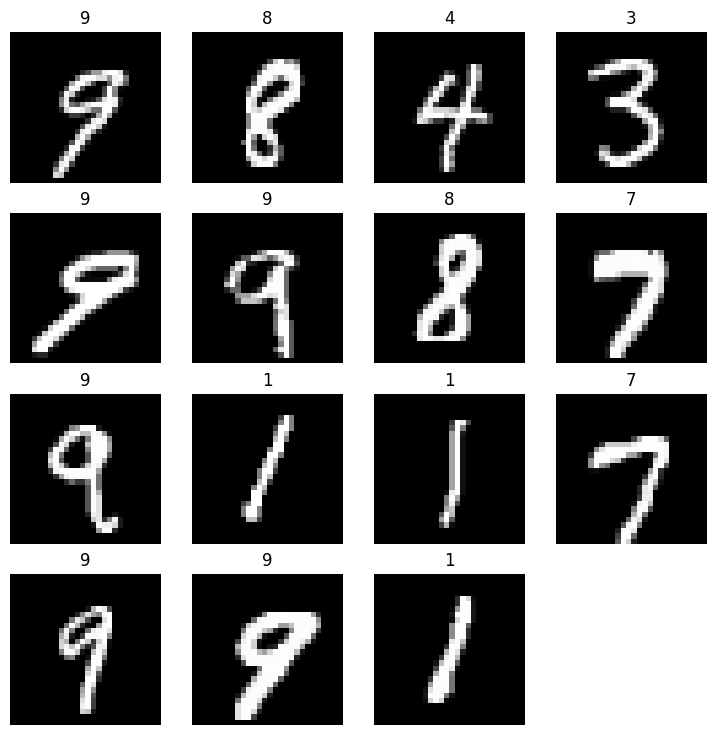

In [32]:
import matplotlib.pyplot as plt



# len(train_dataset), len(test_dataset)
# train_dataset.classes
# train_dataset.class_to_idx

# Display a sample image
fig = plt.figure(figsize = (9, 9))
rows, cols = 4, 4
for i in range(1, rows*cols):
    random_indx = torch.randint(0, len(train_dataset), size = [1]).item()
    image, label = train_dataset[random_indx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(image.squeeze(), cmap = 'grey')
    plt.title(label)
    plt.axis(False)


## 7. Turn the MNIST train and test datasets into dataloaders using `torch.utils.data.DataLoader`, set the `batch_size=32`.

In [33]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(dataset=train_dataset,
                              batch_size=32,
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_dataset,
                              batch_size=32,
                              shuffle=False)

In [34]:
# Items in the train dataloader
train_feature_batch, train_label_batch = next(iter(train_dataloader))
train_feature_batch.shape, train_label_batch.shape 


# Flatten an image
flatten_model = torch.nn.Flatten()
x = train_feature_batch[0]  # select a picture from a batch
output = flatten_model(x)  #flatten an image

print(output.shape)     #display the shape of a flattened image


torch.Size([1, 784])


## 8. Recreate `model_2` used in notebook 03 (the same model from the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/), also known as TinyVGG) capable of fitting on the MNIST dataset.

In [87]:
from torch import nn

class MNISTModel(nn.Module):
    def __init__(self,
                 input_shape: int,
                 hidden_units: int,
                 output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=input_shape, out_features=output_shape),
        nn.ReLU()
        )
    def forward(self, x: torch.Tensor):
        return self.layer_stack(x)



model_0 = MNISTModel(input_shape = 28*28, # value of the flattened layer
                      hidden_units = 10, 
                      output_shape = 10).to(device)

model_0

MNISTModel(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): ReLU()
    (3): Linear(in_features=784, out_features=10, bias=True)
    (4): ReLU()
  )
)

## 9. Train the model you built in exercise 8. for 5 epochs on CPU and GPU and see how long it takes on each.

In [78]:
from torchmetrics import Accuracy


loss_func = nn.CrossEntropyLoss()

acc_fn = Accuracy(task="multiclass", num_classes=10).to(device)
acc_fn

MulticlassAccuracy()

In [88]:
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.1)

AttributeError: partially initialized module 'torch._dynamo' has no attribute 'config' (most likely due to a circular import)

In [46]:
from timeit import default_timer as timer

def print_train_time(start: float,
                     end: float,
                     device: torch.device = None):
    '''Prints differene between start and end time'''
    total_time = end - start
    print(f'Train time on {device}: {total_time} seconds')
    return total_time


epochs = 5
# set seed and start time
torch.manual_seed(42)
train_time_starts = timer()

for epoch in range(epochs):
    print(f'Epoch: {epoch} \n')

    # Training
    train_loss = 0

    # Loop through the training batches
    for batch, (X, y) in enumerate(train_dataloader):
        model_0.train()

        # forward pass
        y_pred = model_0(X)

        # calculate loss per batch
        loss = loss_func(y_pred, y)
        train_loss += loss

        # optimizer.zero_grad()

        loss.backward()

        # optimizer.step()

        if batch % 400 == 0:
            print(f'Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples')
    
    # Divide total train loss by lenght of train batch
    train_loss /= len(train_dataloader)


    # Testing
    test_loss, test_acc = 0, 0
    model_0.eval()

    with torch.inference_mode():
        for X_test, y_test in test_dataloader:
            # forward pass
            test_pred = model_0(X_test)

            # Calculate loss accumulatively
            test_loss += loss_func(test_pred, y_test)

            # Calculate accuracy
            test_acc += acc_fn(test_pred.argmax(dim = 1), y_test)

        # Calculate the test loss average per batch
        test_loss /= len(test_dataloader)

        # Calculate the test accuracy average per batch
        test_acc /= len(test_dataloader)

    # print out what is happening
    print(f'\n Train loss: {train_loss: .4f} | Test loss: {test_loss: .4f}, Test acc: {test_acc: .2f}%')

# Calculate training time
train_time_end = timer()
total_train_time_model  = train_time_end - train_time_starts

print(f'Total time is: {total_train_time_model} seconds')

Epoch: 0 

Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

 Train loss:  2.3234 | Test loss:  2.3227, Test acc:  0.10%
Epoch: 1 

Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

 Train loss:  2.3234 | Test loss:  2.3227, Test acc:  0.10%
Epoch: 2 

Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

 Train loss:  2.3234 | Test loss:  2.3227, Test acc:  0.10%
Epoch: 3 

Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

 Train loss:  2.3234 | Test loss:  2.3227, Test acc:  0.10%
Epoch: 4 

Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
L

## 10. Make predictions using your trained model and visualize at least 5 of them comparing the prediciton to the target label.

## 11. Plot a confusion matrix comparing your model's predictions to the truth labels.

## 12. Create a random tensor of shape `[1, 3, 64, 64]` and pass it through a `nn.Conv2d()` layer with various hyperparameter settings (these can be any settings you choose), what do you notice if the `kernel_size` parameter goes up and down?

In [92]:
torch.manual_seed(42)
rand_tensor = torch.rand(1, 3, 64, 64)


conv_layer = nn.Conv2d(in_channels=3,
                       out_channels=10,
                       kernel_size=3,
                       stride=1,
                       padding=0) 

# Pass the data through the convolutional layer
conv_layer(rand_tensor)

tensor([[[[-0.4691, -0.4745, -0.1707,  ..., -0.0473, -0.2005, -0.1244],
          [-0.5702, -0.3319, -0.1823,  ..., -0.2368, -0.1629, -0.4790],
          [-0.3472, -0.3907, -0.5119,  ..., -0.4424, -0.3473, -0.1770],
          ...,
          [-0.7766, -0.2905, -0.2164,  ..., -0.4766, -0.0298, -0.2621],
          [-0.3300, -0.1676, -0.2699,  ..., -0.0024, -0.5179, -0.3875],
          [-0.1014, -0.3030, -0.3163,  ..., -0.2974, -0.5224, -0.4214]],

         [[-0.3597, -0.4177, -0.2049,  ..., -0.2899, -0.3697, -0.5444],
          [-0.3854, -0.4285, -0.5842,  ..., -0.6162, -0.5806, -0.2415],
          [-0.6971, -0.5213, -0.4129,  ..., -0.4445, -0.5363, -0.2580],
          ...,
          [ 0.0952, -0.2241, -0.4343,  ..., -0.5555, -0.6643, -0.4893],
          [-0.4047, -0.2512, -0.3105,  ..., -0.4566, -0.5259, -0.5010],
          [-0.4586, -0.3828, -0.4418,  ..., -0.5335, -0.1554, -0.2210]],

         [[ 0.8207,  0.8062,  0.7104,  ...,  0.6693,  0.7019,  0.5416],
          [ 0.9648,  0.4394,  

## 13. Use a model similar to the trained `model_2` from notebook 03 to make predictions on the test [`torchvision.datasets.FashionMNIST`](https://pytorch.org/vision/main/generated/torchvision.datasets.FashionMNIST.html) dataset. 
* Then plot some predictions where the model was wrong alongside what the label of the image should've been. 
* After visualing these predictions do you think it's more of a modelling error or a data error? 
* As in, could the model do better or are the labels of the data too close to each other (e.g. a "Shirt" label is too close to "T-shirt/top")?